# Import libraries

In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


#model selection
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Add,Dropout, Dense, Activation, ZeroPadding2D, \
BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
import PIL
import PIL.Image

import glob   
import shutil


# Read the dataset

In [2]:
images=[]
labels=[]
dimension = []

In [3]:
def assign_label(img,flower_type):
    return flower_type

In [4]:
def make_train_data(flower_type):
    DIR = '/' + flower_type + '/'
    current_dir = os.curdir + "/Flowers" + DIR

    for img in tqdm(os.listdir(current_dir)):
        label=assign_label(img,flower_type)    
        path = os.path.join(current_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        images.append(img)
        labels.append(str(label))
        dimension.append(img.shape)
        

In [5]:
classes = ['Tana', 'Rosy', 'Pingpong','Lisianthus', 'Hydrangeas', 'Chrysanthemum', 'Calimerio', 'Babi']

for item in classes:
    make_train_data(item)

100%|███████████████████████████████████████████████████████████████████████████████| 931/931 [00:06<00:00, 154.70it/s]


# Exploratory Data Analysis (EDA)

In [6]:
img_df = pd.DataFrame(dimension, columns = ['Height', 'Width', ''])

print(img_df)

      Height  Width   
0        400    334  3
1        242    208  3
2        259    194  3
3        259    194  3
4        225    225  3
...      ...    ... ..
4616     260    194  3
4617     225    225  3
4618     259    194  3
4619     225    225  3
4620     251    201  3

[4621 rows x 3 columns]


In [11]:
df = pd.DataFrame(labels, columns = ['Flower Type'])
df['Flower Type'].value_counts()

Lisianthus       969
Babi             931
Chrysanthemum    696
Tana             623
Hydrangeas       518
Pingpong         360
Calimerio        353
Rosy             171
Name: Flower Type, dtype: int64

Text(0, 0.5, 'Height')

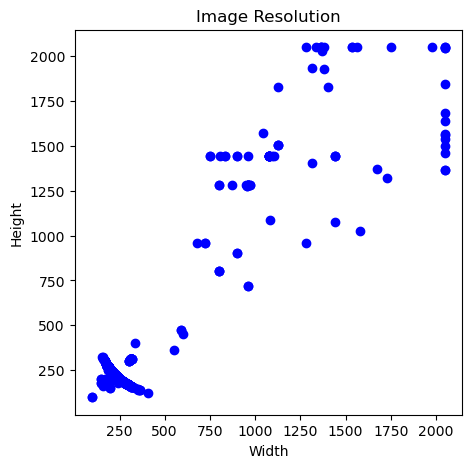

In [8]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
points = ax.scatter(img_df.Width, img_df.Height, color='blue', picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=10)
ax.set_ylabel("Height", size=10)

In [9]:
df_filter = img_df.loc[(img_df['Width'] < 500) & (img_df['Height'] < 500)] 
print(df_filter)

      Height  Width   
0        400    334  3
1        242    208  3
2        259    194  3
3        259    194  3
4        225    225  3
...      ...    ... ..
4616     260    194  3
4617     225    225  3
4618     259    194  3
4619     225    225  3
4620     251    201  3

[4531 rows x 3 columns]


Text(0, 0.5, 'Height')

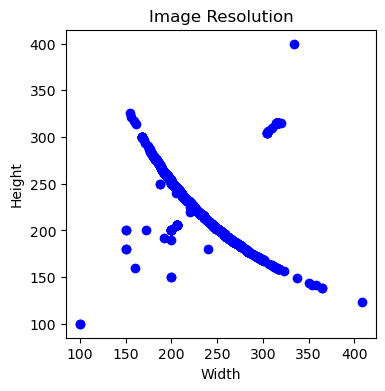

In [10]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
points = ax.scatter(df_filter.Width, df_filter.Height, color='blue', picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=10)
ax.set_ylabel("Height", size=10)

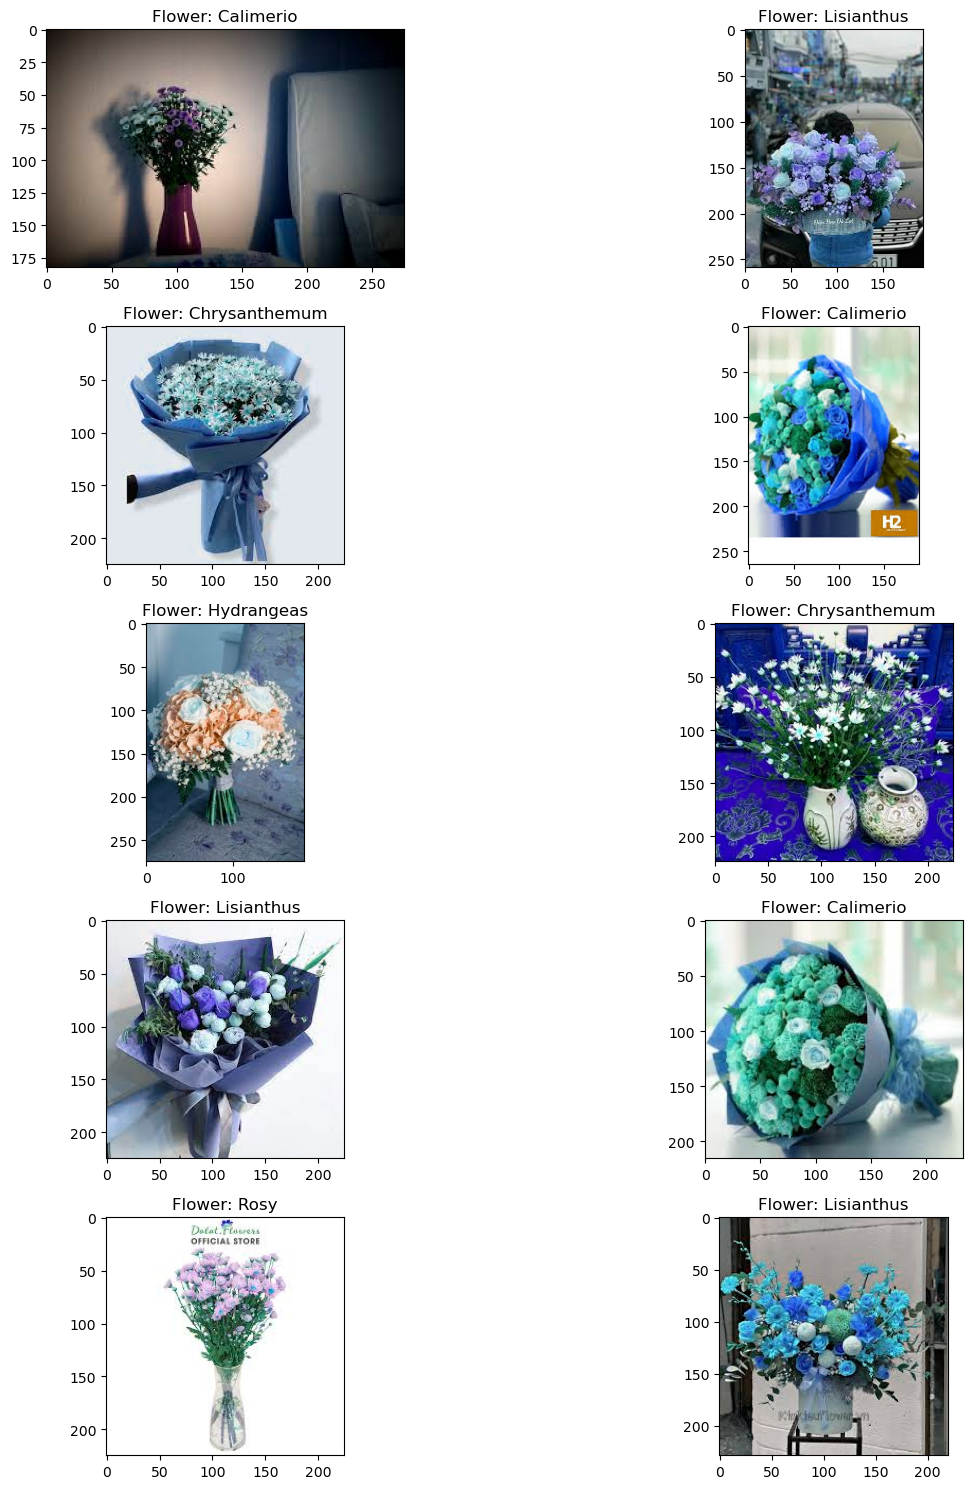

In [13]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(labels))
        ax[i,j].imshow(images[l])
        ax[i,j].set_title('Flower: '+labels[l])
        
plt.tight_layout()